## Entrenamiento

En este apartado vamos a usar cuatro modelos distintos con la finalidad
de comparar y luego encontrar el mejor modelo para nuestro dataset.

Para empezar vamos a cargar la data previamente procesada en el anterior apartado, de ese paso se obtuvo otro subconjunto de datos más pequeño con el cual podremos trabajar los modelos.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor
%matplotlib inline

In [17]:
df_taxi = pd.read_csv('train_cleared.csv')

In [18]:
df_taxi

,fare_amount,passenger_count,distance,day_status,time_status
0,7.7,1,2.802346,0,0
1,7.5,1,1.557516,1,3
2,16.5,1,4.160010,1,2
3,9.0,1,1.254608,1,2
4,5.3,1,1.376087,0,1
...,...,...,...,...,...
8487132,5.5,3,0.872517,1,1
8487133,5.7,3,1.664409,1,1
8487134,13.7,1,2.528474,1,3
8487135,4.5,1,1.163118,0,3


In [19]:
df_taxi['fare_amount'].describe()

count    8.487137e+06
mean     1.114520e+01
std      9.191402e+00
min      2.500000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      4.750000e+02
Name: fare_amount, dtype: float64

In [26]:
# separamos las características que usaremos para predecir
# del resultado, en este caso el resultado que queremos obtener
# es 'fare_amount' a partir del resto de columnas
X = df_taxi.drop(['fare_amount'], axis=1)
y = df_taxi['fare_amount']

In [27]:
# separamos la data de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
print("Número de entradas de entrenamiento:", X_train.shape[0])
print("Número de entradas de prueba:", X_test.shape[0])

Número de entradas de entrenamiento: 5940995
Número de entradas de prueba: 2546142


#### Funcion de metricas
Esta funcion nos ayudara a extraer las 2 metricas mas importantes de nuestro modelo, el error cuadratico medio y 

In [113]:
def learning_curves(estimator, X_train, y_train, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, X_train, y_train , train_sizes = train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Entrenamiento de error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validacion de error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Entrenamiento por lote', fontsize = 14)
    title = 'Curva de aprendizaje ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

In [110]:
## Usaremos una funcion para extraer las metricas del modelo y graficar algunas comparaciones
def model_metric(model, X_test, y_test, name_model):
    print(f"Metricas de modelo {name_model}")
    y_predict = model.predict(X_test)
    print("Graficando...")
    plotting_model(name_model,y_predict,y_test)
    model_mse = np.sqrt(mean_squared_error(y_test, y_predict))
    model_r2 = r2_score(y_test, y_predict)
    print(f"El error cuadrático medio de {name_model} es:", model_mse)
    print(f"La métrica r2 score de {name_model} es:", model_r2)
    return model_mse,model_r2

In [109]:
def plotting_model(name_model,y_pred,y_test):
    bound = 10000
    fig = plt.figure(figsize=(20,5))
    plt.title(f"Visualizacion de datos reales sobre predichos por {name_model}")
    plt.bar(list(range(len(y_test[::bound]))), y_test.values[::bound],
        alpha = 0.5, color = 'red', width = 1, label = 'Valores reales')
    plt.bar(list(range(len(y_pred[::bound]))), y_pred[::bound],
        alpha = 0.7, color = 'blue', width = 1, label = 'Valores predichos')
    plt.legend()
    plt.show()


In [116]:
# Usaremos 4 modelos que probaremos será AdaBoost
name_model = []
model = []
## Linear Regression
lm = LinearRegression(normalize=False, fit_intercept=True)
name_model.append('Linear Regression')
model.append(lm)
## AdaBoost Regressor
ada = AdaBoostRegressor()
name_model.append('AdaBoost Regressor')
model.append(ada)
## RandomForest
n_estimators=10
rf = RandomForestRegressor(n_estimators=n_estimators)
name_model.append('RandomForest Regressor')
model.append(rf)
## XGBoost Regressor
xgbr = XGBRegressor()
name_model.append('XGBoost Regressor')
model.append(xgbr)


-- Linear Regression
Entrenando...
Metricas de modelo Linear Regression
Graficando...


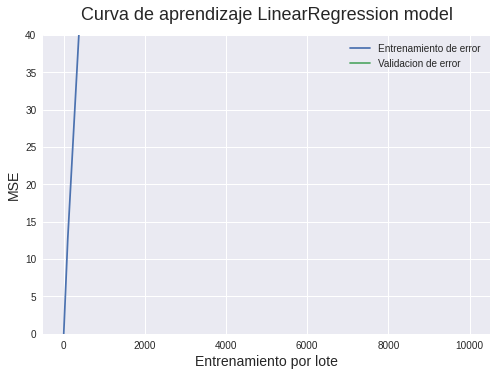

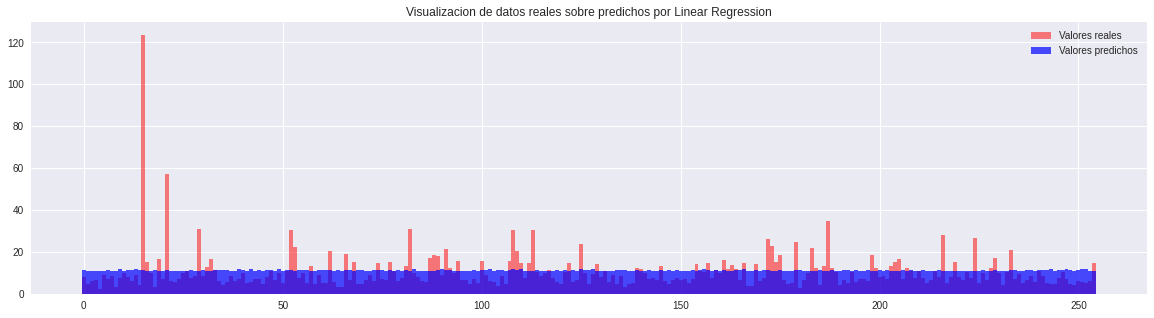

El error cuadrático medio de Linear Regression es: 9.184747423115247
La métrica r2 score de Linear Regression es: 0.0011937076202302999

-- AdaBoost Regressor
Entrenando...
Metricas de modelo AdaBoost Regressor
Graficando...


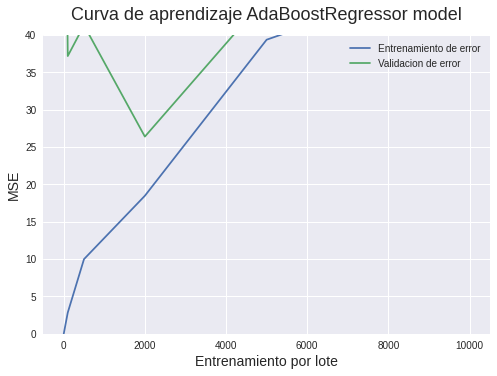

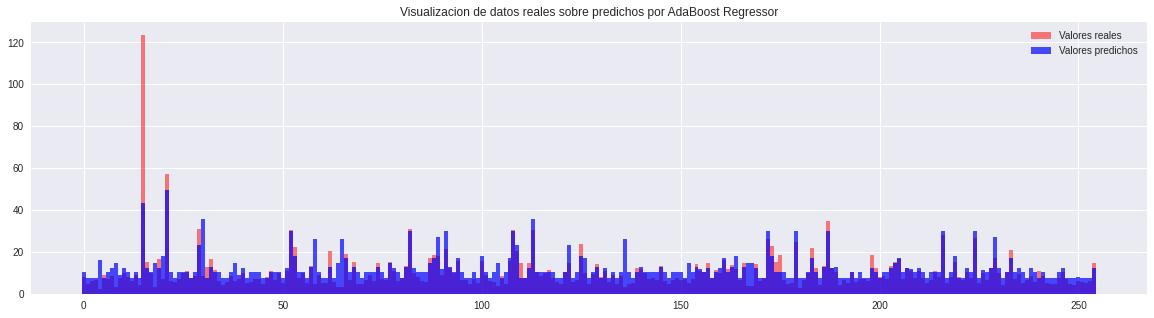

El error cuadrático medio de AdaBoost Regressor es: 5.931634674185627
La métrica r2 score de AdaBoost Regressor es: 0.583422677355474

-- RandomForest Regressor
Entrenando...
Metricas de modelo RandomForest Regressor
Graficando...


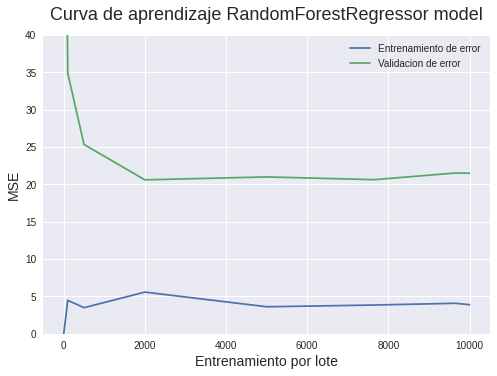

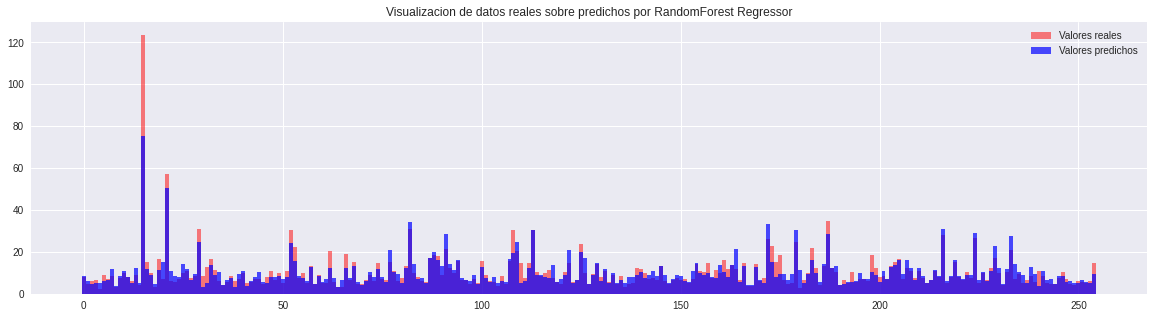

El error cuadrático medio de RandomForest Regressor es: 4.55053694906963
La métrica r2 score de RandomForest Regressor es: 0.7548272919521163

-- XGBoost Regressor
Entrenando...
Metricas de modelo XGBoost Regressor
Graficando...


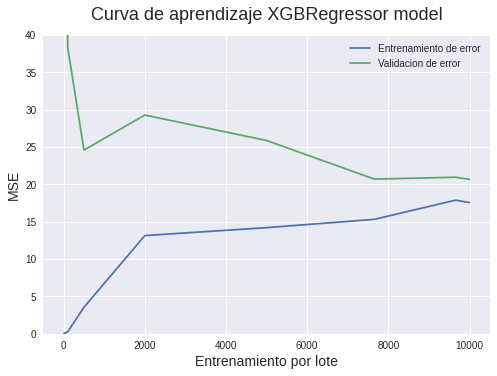

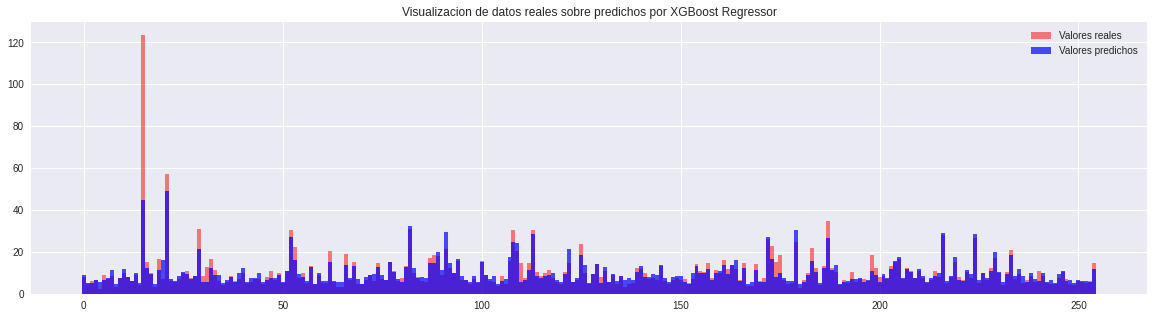

El error cuadrático medio de XGBoost Regressor es: 4.170801197513071
La métrica r2 score de XGBoost Regressor es: 0.7940386105147453


In [118]:
results = []
for nam_model,_model in zip(name_model,model):
    print(f"\n-- {nam_model}")
    print("Entrenando...")
    _model.fit(X_train,y_train)
    learning_curves(_model, X_train, y_train, [1, 100, 500, 2000, 5000, 7654,9654,10000], 5)
    results.append((model_metric(_model,X_test,y_test,nam_model),nam_model))

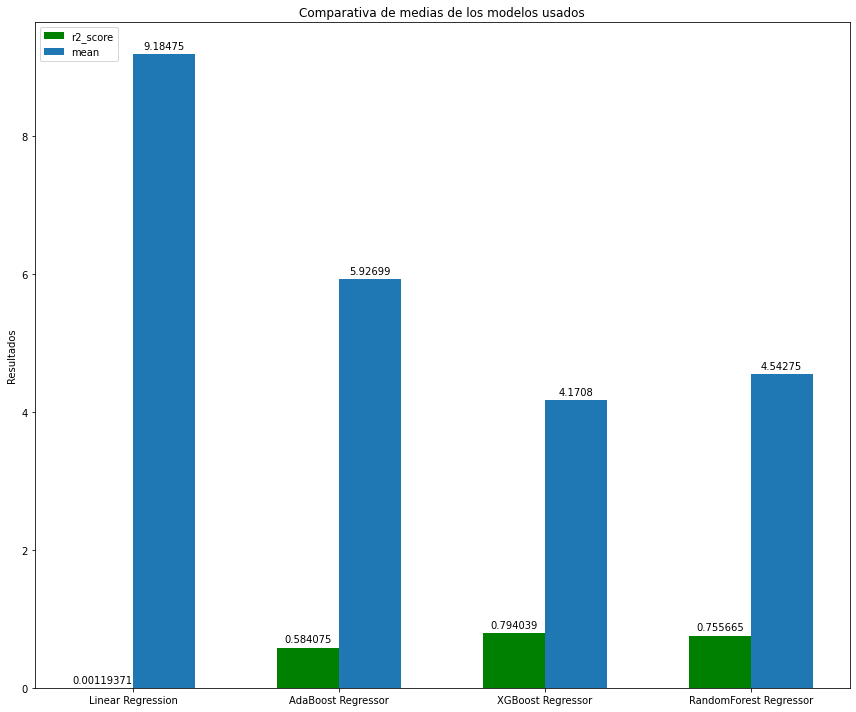

In [93]:
labels = []
r2_score = []
mean = []
for data in results:
    labels.append(data[1])
    r2_score.append(data[0][1])
    mean.append(data[0][0])

fig, ax = plt.subplots(figsize=(12,10))
width = 0.3
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, r2_score, width, label='r2_score',color='green')
rects2 = ax.bar(x + width/2, mean, width, label='mean')

ax.set_ylabel('Resultados')
ax.set_title('Comparativa de medias de los modelos usados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

ax.bar_label(rects1, padding=3)

ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### Analisis
Podemos ver de los resultados que el mejor modelo para estos datos es el XGBoost con un `score` de 0.794039 el cual posee el error cuadratico medio en 4.1708.